title: 'Hands-On Activity: Using ggplot'
output: html_document
https://www.coursera.org/learn/data-analysis-r/quiz/pV7we/hands-on-activity-using-ggplot/attempt
---

## Background for this activity

In this activity, you'll review a scenario, and use ggplot2 to quickly create data visualizations that allow you to explore your data and gain new insights. You will learn more about basic ggplot2 syntax and data visualization in R. 

Throughout this activity, you will also have the opportunity to practice writing your own code by making changes to the code chunks yourself. If you encounter an error or get stuck, you can always check the Lesson2_GGPlot_Solutions .rmd file in the Solutions folder under Week 4 for the complete, correct code. 

## The Scenario

In this scenario, you are a junior data analyst working for a hotel booking company. You have cleaned and manipulated your data, and gotten some initial insights you would like to share. Now, you are going to create some simple data visualizations with the `ggplot2` package. You will use basic `ggplot2` syntax and troubleshoot some common errors you might encounter.    

## Step 1: Import your data

The data in this example is originally from the article Hotel Booking Demand Datasets (https://www.sciencedirect.com/science/article/pii/S2352340918315191), written by Nuno Antonio, Ana Almeida, and Luis Nunes for Data in Brief, Volume 22, February 2019.

The data was downloaded and cleaned by Thomas Mock and Antoine Bichat for #TidyTuesday during the week of February 11th, 2020 (https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md).

You can learn more about the dataset here:
https://www.kaggle.com/jessemostipak/hotel-booking-demand

In the chunk below, you will use the `read_csv()` function to import data from a .csv in the project folder called "hotel_bookings.csv" and save it as a data frame called `hotel_bookings`:

If this line causes an error, copy in the line setwd("projects/Course 7/Week 4") before it. 

```{r load data}
hotel_bookings <- read.csv("hotel_bookings.csv")
```

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('hotel_bookings.csv')

## Step 2: Look at a sample of your data

Use the head() function to preview your data: 
```{r examining your data}
head(hotel_bookings)
```



In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


You can also use colnames() to get the names of all the columns in your data set. Run the code chunk below to find out the column names in this data set:

```{r look at column names}
colnames(hotel_bookings)
```

In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
df.info() # info gives more info on the data frame, but doesn't show all the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Step 3: Install and load the 'ggplot2' package

If you haven't already installed and loaded the `ggplot2` package, you will need to do that before you can use the `ggplot()` function. 

Run the code chunk below to install and load `ggplot2`. This may take a few minutes.

```{r loading and installing ggplot2, echo=FALSE, message=FALSE}
install.packages('ggplot2')
library(ggplot2)
```

## Step 4: Begin creating a plot

A stakeholder tells you, "I want to target people who book early, and I have a hypothesis that people with children have to book in advance."

When you start to explore the data, it doesn't show what you would expect. That is why you decide to create a visualization to see how true that statement is-- or isn't.

You can use `ggplot2` to do this. Try running the code below:

```{r creating a plot}
ggplot(data = hotel_bookings) +
  geom_point(mapping = aes(x = lead_time, y = children))
```

<AxesSubplot:xlabel='lead_time', ylabel='children'>

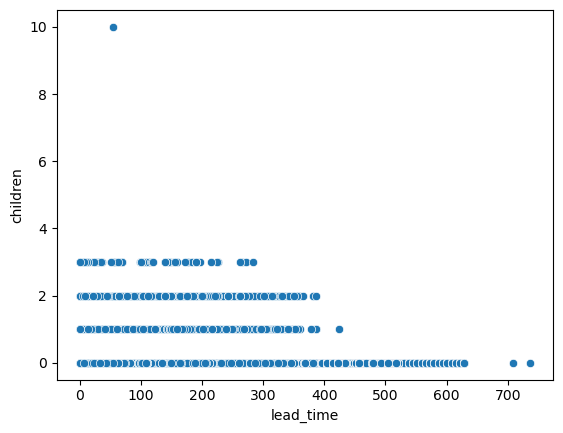

In [8]:
import seaborn as sns

sns.scatterplot(x='lead_time', y='children', data=df)

The geom_point() function uses points to create a scatterplot. Scatterplots are useful for showing the relationship between two numeric variables. In this case, the code maps the variable 'lead_time' to the x-axis and the variable 'children' to the y-axis. 

On the x-axis, the plot shows how far in advance a booking is made, with the bookings furthest to the right happening the most in advance. On the y-axis it shows how many children there are in a party.

The plot reveals that your stakeholder's hypothesis is incorrect. You report back to your stakeholder that many of the advanced bookings are being made by people with 0 children. 

## Step 5: Try it on your own

Next, your stakeholder says that she wants to increase weekend bookings, an important source of revenue for the hotel. Your stakeholder wants to know what group of guests book the most weekend nights in order to target that group in a new marketing campaign. She suggests that guests without children book the most weekend nights. Is this true? 

Try mapping 'stays_in_weekend_nights' on the x-axis and 'children' on the y-axis by filling out the remainder of the code below.

```{r}
ggplot(data = hotel_bookings) +
 geom_point(mapping = aes(x = , y = ))
```

<AxesSubplot:xlabel='stays_in_weekend_nights', ylabel='children'>

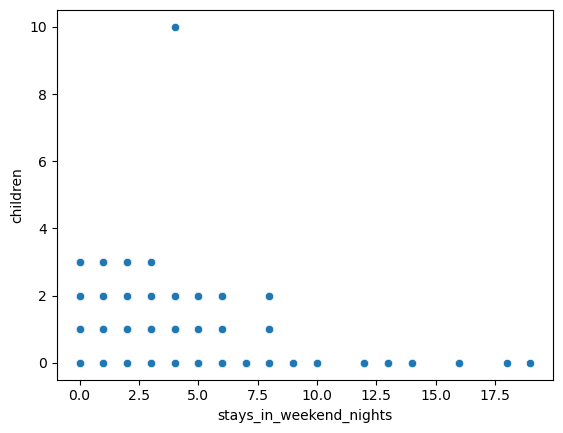

In [9]:
sns.scatterplot(x='stays_in_weekend_nights', y='children', data=df)

If you correctly enter this code, you should have a scatterplot with 'stays_in_weekend_nights' on the x-axis and 'children' on the y-axis. 

What did you discover? Is your stakeholder correct?

What other types of plots could you use to show this relationship?

Remember, if you're having trouble filling out a code block, check the solutions document for this activity. 

## Activity Wrap Up
The `ggplot2` package allows you to quickly create data visualizations that can answer questions and give you insights about your data. Now that you are a little more familiar with the basic `ggplot2` syntax, you can practice these skills by modifying the code chunks in the rmd file, or use this code as a starting point in your own project console. With `ggplot2`, you will be able to create and share data visualizations without leaving your `R` console. You will learn more about `ggplot2` throughout this course and eventually create even more complex and beautiful visualizations!
